Estimated mu:  0.15235104309138323
Estimated sigma:  0.2427495542037142


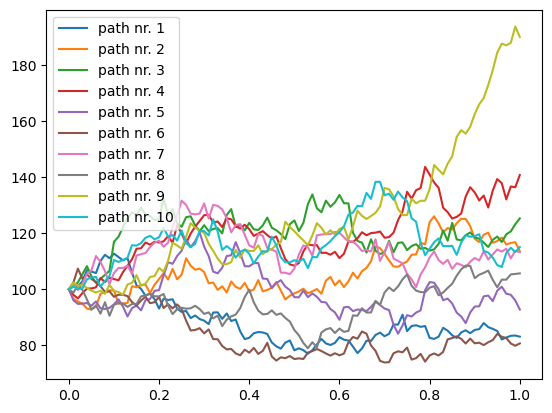

In [205]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Geometric Brownian Motion Parameters
A0 = 100
mu = 0.1
sigma = 0.25


# Time setup
T = 1        # Final time of the simulation
N = 100    # Number of time points excluding t=0
deltat = T/N # Time increment
time = np.linspace(0,T,N+1)

def exact_solution(t,S0,mu,sigma,z):

    return S0*np.exp((mu-0.5*sigma**2)*t + sigma*np.sqrt(t)*z)

# Montecarlo Simulation
# A <- Euler method
# S <- Using exact solution

Npaths = 10 # Number of paths to simulate
paths = []   # Initialize array containing each path


for j in range(Npaths):
    A = [] # Discretization of the SDE
    S = [] # Using the exact solution of the Geometric brownian motion

    A.append(A0) # Initialize A at t = 0 to be A0
    S.append(A0) # Initialize S at t = 0 to be S0 = A0

    for i in range(N):
        z = np.random.randn()
        A.append(A[i] + mu*A[i]*deltat + sigma*A[i]*np.sqrt(deltat)*z)
        S.append(exact_solution(deltat,S[i],mu,sigma, z))
        
    paths.append(A)



# Prints the simulated paths
# @input an array of paths

def PrintPaths(paths):
    i = 1
    for path in paths:
        name = "path nr. " + str(i)
        plt.plot(time, path, label = name)
        i = i + 1
    plt.legend()



# Estimates of Parameters from a collection of paths
# @Input: paths
# @Output: vector of estimated [mu, sigma]

def EstimateParameters(paths):
    estimatedMus = []
    estimatedSigmas = []
    for path in paths:
        logReturns = []
        for k in range (N-1):
            logReturns.append(np.log(path[k+1]/path[k]))
        estimatedMus.append(np.mean(logReturns)/deltat + 0.5*sigma**2)
        estimatedSigmas.append(np.std(logReturns)/ np.sqrt(deltat))
    return [np.mean(estimatedMus), np.mean(estimatedSigmas)]



############################## OUTPUT ##############################

estimatedParameters = EstimateParameters(paths)
print("Estimated mu: ", estimatedParameters[0])
print("Estimated sigma: ", estimatedParameters[1])
PrintPaths(paths)

In [206]:
from scipy.stats import norm

# Black Scholes Pricing for call option

def BlackScholesPriceCall(r,S, timeToMaturity, sigma, K):

    d1 = (np.log(S/K)+(r + 0.5*sigma**2)*timeToMaturity)/(sigma*np.sqrt(timeToMaturity))
    d2 = d1 - sigma*np.sqrt(timeToMaturity)
    return norm.cdf(d1)*S - norm.cdf(d2)*K*np.exp(-r*(timeToMaturity))


r = 0.03              # risk-free rate
S = 100               # value of the stock at t
timeToMaturity = 1    # time to maturity
K = 110               # strike price
sigma = 0.25           # volatility

print(BlackScholesPriceCall(r,S, timeToMaturity, sigma, K))

7.255776345971057


In [207]:
import numpy as np
import matplotlib.pyplot as plt


# Geometric Brownian Motion Parameters
A0 = 100
mu = 0.03
sigma = 0.25


# Time setup
T = 1        # Final time of the simulation
N = 40    # Number of time points excluding t=0
deltat = T/N # Time increment
time = np.linspace(0,T,N+1)

def exact_solution(t,S0,mu,sigma,z):

    return S0*np.exp((mu-0.5*sigma**2)*t + sigma*np.sqrt(t)*z)

# Montecarlo Simulation
# A <- Euler method
# S <- Using exact solution

Npaths = 100000 # Number of paths to simulate
paths = []   # Initialize array containing each path


for j in range(Npaths):
    A = [] # Discretization of the SDE
    S = [] # Using the exact solution of the Geometric brownian motion

    A.append(A0) # Initialize A at t = 0 to be A0
    S.append(A0) # Initialize S at t = 0 to be S0 = A0

    for i in range(N):
        z = np.random.randn()
        A.append(A[i] + mu*A[i]*deltat + sigma*A[i]*np.sqrt(deltat)*z)
        S.append(exact_solution(deltat,S[i],mu,sigma, z))
        
    paths.append(S)



def CallPriceMontecarlo(paths, K, r, timeToMaturity):
    payoff = []
    for path in paths:
        payoff.append(np.maximum(path[-1]-K,0))
    return np.exp(-r*timeToMaturity)*np.mean(payoff)

############################## OUTPUT ##############################
r = mu              # risk-free rate
timeToMaturity = 1    # time to maturity
K = 110               # strike price

print("Estimated call price: ", CallPriceMontecarlo(paths, K, r, timeToMaturity))


Estimated call price:  7.209961296645371


In [250]:
from scipy.optimize import minimize


# Black Scholes Pricing for call option
def BlackScholesPriceCall(r,S, timeToMaturity, sigma, K):

    d1 = (np.log(S/K)+(r + 0.5*sigma**2)*timeToMaturity)/(sigma*np.sqrt(timeToMaturity))
    d2 = d1 - sigma*np.sqrt(timeToMaturity)
    return norm.cdf(d1)*S - norm.cdf(d2)*K*np.exp(-r*(timeToMaturity))

# Geometric Brownian Motion Parameters
A0 = 100
mu = 0.03
sigma = 0.25


# Time setup
T = 1        # Final time of the simulation
N = 100    # Number of time points excluding t=0
deltat = T/N # Time increment
time = np.linspace(0,T,N+1)

def exact_solution(t,S0,mu,sigma,z):

    return S0*np.exp((mu-0.5*sigma**2)*t + sigma*np.sqrt(t)*z)

# Montecarlo Simulation
# A <- Euler method
# S <- Using exact solution

Npaths = 1000 # Number of paths to simulate
paths = []   # Initialize array containing each path


for j in range(Npaths):
    A = [] # Discretization of the SDE
    S = [] # Using the exact solution of the Geometric brownian motion

    A.append(A0) # Initialize A at t = 0 to be A0
    S.append(A0) # Initialize S at t = 0 to be S0 = A0

    for i in range(N):
        z = np.random.randn()
        A.append(A[i] + mu*A[i]*deltat + sigma*A[i]*np.sqrt(deltat)*z)
        S.append(exact_solution(deltat,S[i],mu,sigma, z))
        
    paths.append(S)



def CallPricesMontecarlo(paths, K, r, timeToMaturity):
    payoff = []
    for path in paths:
        payoff.append(np.maximum(path[-1]-K,0))
    return np.exp(-r*timeToMaturity)*np.array(payoff)







def lossFunction(parameters, marketPrices):
    S, sigma= parameters
    r = 0.03
    K = 110
    timeToMaturity = 1
    blackScholesPrice = BlackScholesPriceCall(r, S, timeToMaturity, sigma, K)
    return np.sum((blackScholesPrice-marketPrices)**2)

marketPrices = 7.25 + np.random.normal(0,1,1000)

result = minimize(lossFunction, [70,1], args=(marketPrices,))
print(result.x)
print(result.fun)
    


[99.07426953  0.26000321]
968.5764335083953


/var/folders/2y/jjmf11s10v96l0m4n3tt_xnh0000gn/T/ipykernel_15223/4253899652.py:38: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(A/K)+(r + 0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
/var/folders/2y/jjmf11s10v96l0m4n3tt_xnh0000gn/T/ipykernel_15223/4253899652.py:38: RuntimeWarning: invalid value encountered in log
  d1 = (np.log(A/K)+(r + 0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
/var/folders/2y/jjmf11s10v96l0m4n3tt_xnh0000gn/T/ipykernel_15223/4253899652.py:38: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(A/K)+(r + 0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))


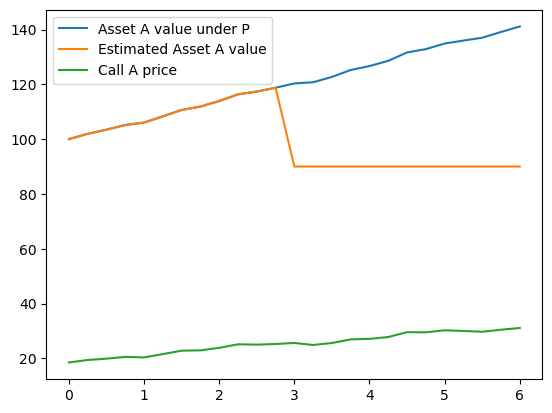

Estimated mu:  0.05751879063689231
Estimated sigma:  0.010467695628309164


In [303]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve




def exact_solution(t,S0,mu,sigma,z):

    return S0*np.exp((mu-0.5*sigma**2)*t + sigma*np.sqrt(t)*z)



# Prints the simulated paths
# @input an array of paths




# Estimates of Parameters from a collection of paths
# @Input: paths
# @Output: vector of estimated [mu, sigma]

def EstimateParameters(paths):
    estimatedMus = []
    estimatedSigmas = []
    for path in paths:
        logReturns = []
        for k in range (N-1):
            logReturns.append(np.log(path[k+1]/path[k]))
        estimatedMus.append(np.mean(logReturns)/deltat + 0.5*sigma**2)
        estimatedSigmas.append(np.std(logReturns)/ np.sqrt(deltat))
    return [np.mean(estimatedMus), np.mean(estimatedSigmas)]


def BlackScholesPriceCall(r, A, T, t, sigma, K):

    d1 = (np.log(A/K)+(r + 0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)
    return norm.cdf(d1)*A - norm.cdf(d2)*K*np.exp(-r*(T-t))


def getAssetPriceFromCallPrice(callPrices, r, T, times, sigma, K):

    estimatedAssetValue = []

    def lossFunction(parameter, sigma, r, T, t, K, marketCallPrice):
        A = parameter
        blackScholesPrice = BlackScholesPriceCall(r, A, T, t, sigma, K)

        return (blackScholesPrice-marketCallPrice)**2

    for i in range(len(callPrices)):
        
        result = minimize(lossFunction, [70], args=(sigma, r, T, time[i], K, callPrices[i],))
        estimatedAssetValue.append(result.x)
    
    return estimatedAssetValue


############################## OUTPUT ##############################

# Geometric Brownian Motion Parameters and number of simulations
A0 = 100
mu = 0.05
sigma = 0.016
r = 0.05
K = 110



# Time setup
T = 6        # Final time of the simulation
N = 24    # Number of time points excluding t=0
deltat = T/N # Time increment
time = np.linspace(0,T,N+1)


A = [] # Discretization of the SDE
callPrices = [] # Call prices at each instant

A.append(A0) # Initialize A at t = 0 to be A0
callPrices.append(BlackScholesPriceCall(r, A[0], T, time[0], sigma, K))

for i in range(N):
    z = np.random.randn()
    A.append(A[i] + mu*A[i]*deltat + sigma*A[i]*np.sqrt(deltat)*z)
    callPrices.append(BlackScholesPriceCall(r, A[i+1], T, time[i+1], sigma, K))










def lossFunction(parameter, sigma, r, T, t, K, marketCallPrice):
    A = parameter
    blackScholesPrice = BlackScholesPriceCall(r, A, T, t, sigma, K)

    return (blackScholesPrice-marketCallPrice)**2


estimatedAssetValues = []

for i in range(N+1):
    #result = minimize(lossFunction, [110], args=(sigma, r, T, time[i], K, callPrices[i],))
    #estimatedAssetValues.append(result.x)
    result = fsolve(lossFunction, [90,140],  args=(sigma, r, T, time[i], K, callPrices[i],))
    estimatedAssetValues.append(result[0])



plt.plot(time, A, label = "Asset A value under P")
plt.plot(time, estimatedAssetValues, label = "Estimated Asset A value")
plt.plot(time, callPrices, label = "Call A price")

plt.legend()
plt.show()

estimatedParameters = EstimateParameters([A])
print("Estimated mu: ", estimatedParameters[0])
print("Estimated sigma: ", estimatedParameters[1])


In [306]:

def Bisection():
    def f(x):
        return x**2 - 4

    [a, b] = 1, 3
    tolerance = 0.01

    while b - a > tolerance:
        c = (a + b) / 2
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return c
print("Root:", Bisection())


Root: 2.9921875


/var/folders/2y/jjmf11s10v96l0m4n3tt_xnh0000gn/T/ipykernel_15223/2229372314.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(A/K)+(r + 0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))


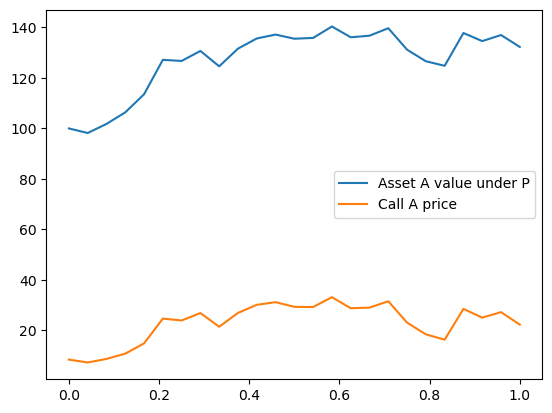

Estimated mu:  0.36230590273249647
Estimated sigma:  0.21029764018764457


In [331]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


# Estimates of Parameters from a collection of paths
# @Input: paths
# @Output: vector of estimated [mu, sigma]

def EstimateParameters(paths):
    estimatedMus = []
    estimatedSigmas = []
    for path in paths:
        logReturns = []
        for k in range (N-1):
            logReturns.append(np.log(path[k+1]/path[k]))
        estimatedMus.append(np.mean(logReturns)/deltat + 0.5*sigma**2)
        estimatedSigmas.append(np.std(logReturns)/ np.sqrt(deltat))
    return [np.mean(estimatedMus), np.mean(estimatedSigmas)]


def BlackScholesPriceCall(r, A, T, t, sigma, K):

    d1 = (np.log(A/K)+(r + 0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)
    return norm.cdf(d1)*A - norm.cdf(d2)*K*np.exp(-r*(T-t))


def getAssetPriceFromCallPrice(callPrices, r, T, times, sigma, K):

    estimatedAssetValue = []

    def lossFunction(parameter, sigma, r, T, t, K, marketCallPrice):
        A = parameter
        blackScholesPrice = BlackScholesPriceCall(r, A, T, t, sigma, K)

        return (blackScholesPrice-marketCallPrice)**2

    for i in range(len(callPrices)):
        
        result = minimize(lossFunction, [70], args=(sigma, r, T, time[i], K, callPrices[i],))
        estimatedAssetValue.append(result.x)
    
    return estimatedAssetValue


############################## OUTPUT ##############################

# Geometric Brownian Motion Parameters and number of simulations
A0 = 100
mu = 0.5
sigma = 0.26
r = 0.05
K = 110



# Time setup
T = 1        # Final time of the simulation
N = 24    # Number of time points excluding t=0
deltat = T/N # Time increment
time = np.linspace(0,T,N+1)


A = [] # Discretization of the SDE
callPrices = [] # Call prices at each instant

A.append(A0) # Initialize A at t = 0 to be A0
callPrices.append(BlackScholesPriceCall(r, A[0], T, time[0], sigma, K))

for i in range(N):
    z = np.random.randn()
    A.append(A[i] + mu*A[i]*deltat + sigma*A[i]*np.sqrt(deltat)*z)
    callPrices.append(BlackScholesPriceCall(r, A[i+1], T, time[i+1], sigma, K))






def lossFunction(parameter, sigma, r, T, t, K, marketCallPrice):
    A = parameter
    blackScholesPrice = BlackScholesPriceCall(r, A, T, t, sigma, K)

    return (blackScholesPrice-marketCallPrice)**2


estimatedAssetValues = []

for i in range(N):
    #result = minimize(lossFunction, [300], args=(sigma, r, T, time[i], K, callPrices[i],))
    #estimatedAssetValues.append(result.x)

    a, b = 100, 120
    tolerance = 30
    
    while b - a > tolerance:
        c = (a + b) / 2

        
        if lossFunction(c, sigma, r, T, time[i], K, callPrices[i]) * lossFunction(a, sigma, r, T, time[i], K, callPrices[i]) < 0:
            b = c
        else:
            a = c
    estimatedAssetValues.append(c)

    #result = fsolve(lossFunction, [90,140],  args=(sigma, r, T, time[i], K, callPrices[i],))
    #estimatedAssetValues.append(result[0])
    


plt.plot(time, A, label = "Asset A value under P")
#plt.plot(time[:-1], estimatedAssetValues, label = "Estimated Asset A value")
plt.plot(time, callPrices, label = "Call A price")

plt.legend()
plt.show()

estimatedParameters = EstimateParameters([A])
print("Estimated mu: ", estimatedParameters[0])
print("Estimated sigma: ", estimatedParameters[1])


In [335]:

def assetValueModifiedFromBook(alpha, beta, A):
    return alpha*A + beta


A = np.linspace(0,1,10)
alpha = 2
beta = 0

print(assetValueModifiedFromBook(alpha, beta, A))

[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]


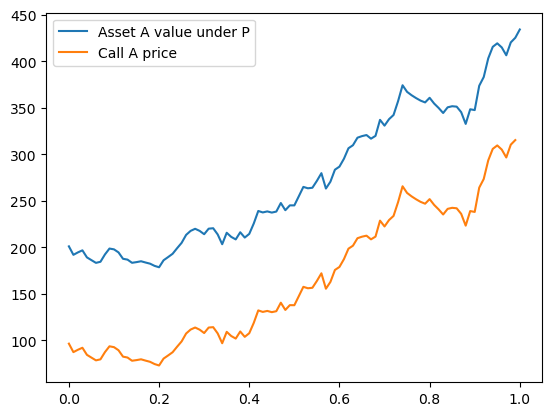

In [354]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.stats import norm
from scipy.optimize import minimize


# Estimates of Parameters from a collection of paths
# @Input: paths
# @Output: vector of estimated [mu, sigma]

def EstimateParameters(paths):
    estimatedMus = []
    estimatedSigmas = []
    for path in paths:
        logReturns = []
        for k in range (N-1):
            logReturns.append(np.log(path[k+1]/path[k]))
        estimatedMus.append(np.mean(logReturns)/deltat + 0.5*sigma**2)
        estimatedSigmas.append(np.std(logReturns)/ np.sqrt(deltat))
    return [np.mean(estimatedMus), np.mean(estimatedSigmas)]


# Black Scholes Pricing of Call Option
# @Input: r: risk-free interest rate, initial
#         A: initial asset price
#         T: maturity
#         t: current time
#     sigma: volatility
#         K: strike price (Book value of liabilities)
#
# @Output: Black Scholes price of a call option

def BlackScholesPriceCall(r, A, T, t, sigma, K):

    d1 = (np.log(A/K)+(r + 0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)
    return norm.cdf(d1)*A - norm.cdf(d2)*K*np.exp(-r*(T-t))


# Loss Function

def lossFunction(parameter, Abook, sigma, r, T, t, K, marketCallPrice):
    alpha, beta = parameter
    A = assetValueModifiedFromBook(alpha, beta, Abook)
    blackScholesPrice = BlackScholesPriceCall(r, A, T, t, sigma, K)

    return (blackScholesPrice-marketCallPrice)**2


def assetValueModifiedFromBook(alpha, beta, A):
    return alpha*A + beta



## Construct the time series for the asset price and for the call option

def constructAssetTimeSeries(A0, mu, deltat, sigma, N):
    A = [] # Discretization of the SDE
    A.append(A0) # Initialize A at t = 0 to be A0
    for i in range(N):
        z = np.random.randn()
        A.append(A[i] + mu*A[i]*deltat + sigma*A[i]*np.sqrt(deltat)*z)
    return np.array(A)

def constructCallPriceTimeSeries(r, A, T, time, sigma, K, N):
    callPrices = [] # Call prices at each instant
    callPrices.append(BlackScholesPriceCall(r[0], A[0], T, time[0], sigma, K))

    for i in range(N-1):
        callPrices.append(BlackScholesPriceCall(r[i+1], A[i+1], T, time[i+1], sigma, K))

    return np.array(callPrices)


############################## OUTPUT ##############################

N = 100    # Number of time points excluding t=0

# Geometric Brownian Motion Parameters and number of simulations
A0 = 100
mu = 0.5
sigma = 0.26
r = 0.05*np.ones(N)
K = 110

# Time setup
T = 1        # Final time of the simulation
deltat = T/N # Time increment
time = np.linspace(0,T,N+1)


Abook = constructAssetTimeSeries(A0, mu, deltat, sigma, N)
A = assetValueModifiedFromBook(2,1,Abook)
callPrices = constructCallPriceTimeSeries(r, A, T, time, sigma, K, N)



plt.plot(time, A, label = "Asset A value under P")
plt.plot(time[:-1], callPrices, label = "Call A price")

plt.legend()
plt.show()
